## 🔹 **Step 1: What is a Convolutional Neural Network (CNN)?**

---

### ✅ Why Not Use ANN for Images?

In a traditional ANN (like we used in the Iris project):

* Input is flattened into a **1D array**

  * Example: A 28×28 image becomes 784 values in a row
* The network **doesn’t understand spatial relationships**

  * It sees pixels as individual numbers, not as a picture.

This is a problem because:

> A nose in the top-left corner shouldn’t be the same as a nose in the middle of the face, right?

---

### ✅ CNN is Built for Images 🎯

**CNN = Convolutional Neural Network**

| Traditional ANN                       | CNN                                                        |
| ------------------------------------- | ---------------------------------------------------------- |
| Works best on structured/tabular data | Works best on **image data**                               |
| Input is 1D feature vector            | Input is 2D or 3D image                                    |
| No spatial awareness                  | **Understands spatial patterns** (edges, textures, shapes) |

---

### 🧠 CNN Works in 3 Key Steps:

1. **Convolution Layer**

   * Applies filters to detect **edges, corners, shapes**.
   * Output: A feature map that highlights patterns in the image.

2. **Pooling Layer**

   * Downsamples the image → makes the computation faster.
   * Keeps the **important features** and reduces size.

3. **Flatten + Dense Layers**

   * Turns feature maps into a 1D vector.
   * Feeds that into **fully connected layers** (like ANN) to make predictions.

---

### 🔍 Simple Visual Analogy:

> Think of a CNN like a human eye 👁️

* It doesn’t look at all pixels individually.
* It focuses on **edges, corners, patterns** to understand what it's seeing.

---

### ✅ CNNs are used in:

* 📷 Image classification (e.g., recognize cats vs dogs)
* 🚗 Self-driving cars (detect traffic signs)
* 🧠 Medical imaging (detect tumors in scans)
* 🛍️ Fashion detection (classify clothes like in Fashion MNIST)

---

---

## 🔹 **Step 2: Key CNN Layers We’ll Use**

Each of these layers has a specific job in helping the CNN "see" and "understand" the image step-by-step.

---

### 🧩 1. **Conv2D** — *The Feature Detector*

**What it does:**

Applies **filters** (tiny image scanners) over the input image to find **patterns** like edges, curves, textures.

**Analogy:**

Imagine sliding a magnifying glass 🔍 across an image to find where a certain shape (like a vertical edge) appears.

### 🧩 2. **MaxPooling2D** — *The Downsampler*

**What it does:**

Shrinks the size of the image by keeping only the most important parts.

**Analogy:**

Think of looking at a group of 4 pixels (2x2 block) and keeping **only the brightest one** — this reduces size but keeps the strongest signal.

### 🧩 3. **Flatten** — *The Image Flattener*

**What it does:**

Takes the 2D image feature map and **flattens it into a 1D vector** (a line of numbers).

**Analogy:**

Imagine taking all rows in an image and laying them side-by-side into a single row.

* Prepares the data for the **Dense (fully connected) layer**, just like we used in ANN.

### 🧩 4. **Dense** — *The Classifier*

**What it does:**

Final decision-making layer(s) that connects every feature to every possible output.

### 🔁 The Full Flow Looks Like:

```
Input Image (28x28)
→ Conv2D
→ ReLU
→ MaxPooling2D
→ Conv2D
→ ReLU
→ MaxPooling2D
→ Flatten
→ Dense(hidden)
→ Dense(output)
```
---

---

## 🔹 **Step 3: Dataset — Fashion MNIST 👗👟🧢**

### 🧵 What is Fashion MNIST?

It’s a dataset of **clothing item images** designed as a more realistic version of the original MNIST (which had handwritten digits).

Fashion MNIST has **black-and-white images** of size `28x28` pixels.

| Class Index | Class Name  |
| ----------- | ----------- |
| 0           | T-shirt/top |
| 1           | Trouser     |
| 2           | Pullover    |
| 3           | Dress       |
| 4           | Coat        |
| 5           | Sandal      |
| 6           | Shirt       |
| 7           | Sneaker     |
| 8           | Bag         |
| 9           | Ankle boot  |

---


## **🔹 Step 4**

### **✅ Part 1. Load and Preprocess Data (for CNN)**

In [ ]:
from tensorflow.keras.datasets import fashion_mnist # This loads the dataset module for Fashion MNIST. It's already built into TensorFlow.
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Load the Data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data() # it is a dataset that is pre-split into train test part

# (x_train, y_train), (x_test, y_test)
# → This unpacks the data into 4 parts:
# x_train: images for training (60,000 images)
# y_train: labels for training (like 0 = T-shirt, 1 = Trouser...)
# x_test: images for testing (10,000 images)
# y_test: labels for testing

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


**🔎Check the shapes of data:**

In [ ]:
print(x_train.shape) # (60000, 28, 28)
print(y_train.shape) # (60000,)

(60000, 28, 28)
(60000,)


This means:

* You have **60,000 training images**
* Each image is **28x28 pixels**
* Each label is a number from **0 to 9 for each of those 60,000 training images** 

**🖼 Optional: Show a sample image**

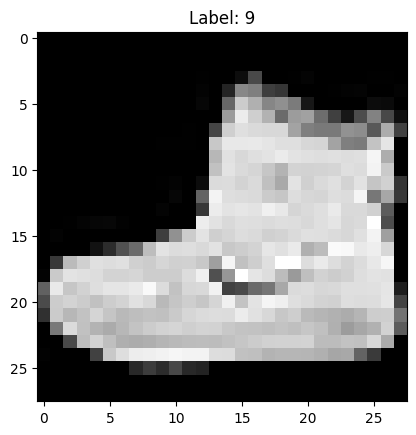

In [ ]:
plt.imshow(x_train[0], cmap="gray") # imshow(...) → Shows the image and cmap='gray' → Displays it in grayscale
plt.title(f"Label: {y_train[0]}")
plt.show()

**🧼 Now: Normalize pixel values**

Before feeding images into a CNN, we must **scale the pixel values**.

In [ ]:
x_train =  x_train / 255.0
x_test = x_test / 255.0

* Original pixel values range from 0 to 255

* Dividing by `255.0` scales them to 0 to 1 range — which makes the training faster and more stable.

**📐 Reshape the data for CNN**

In [ ]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# reshape(...) changes the shape of the array.
# -1 → Automatically calculates the number of samples (e.g., 60000)
# 28, 28 → Height and width of image
# 1 → Number of channels (grayscale)

CNN expects the data in the shape:

(num_samples, height, width, channels)

Here, the images are grayscale, so channels = 1

---

### 🧠 **Why Does CNN Expect Data in That Shape?**

CNNs (Convolutional Neural Networks) are designed to work with **images**.

But images are not just rows of numbers — they have **height**, **width**, and **color channels** (like RGB for color or just one channel for grayscale).

So the CNN expects each image in this format:

```
(num_samples, height, width, channels)
```

Let’s break that down:

| Term          | What It Means                                               |
| ------------- | ----------------------------------------------------------- |
| `num_samples` | Number of images in the dataset (e.g., 60,000 for training) |
| `height`      | Height of each image (28 pixels for Fashion MNIST)          |
| `width`       | Width of each image (28 pixels)                             |
| `channels`    | How many **color channels** the image has:                  |
|               | - `1` for **grayscale** (black-and-white) images            |
|               | - `3` for **color** images (Red, Green, Blue → RGB)         |

---

### 🖼️ **Fashion MNIST Images Are Grayscale**

That means:

* Each image has **only one channel** (black/white intensity).
* No color involved → **channels = 1**

So a **single image** would be of shape:

```
(28, 28, 1)
```

* 28 rows (height)
* 28 columns (width)
* 1 grayscale channel

---

### 🔄 So why `reshape(-1, 28, 28, 1)`?

```python
X_train = X_train.reshape(-1, 28, 28, 1)
```

* `-1` means: "Let NumPy calculate the number of images automatically"
* `28, 28` → the size of each image
* `1` → number of channels = 1 (because grayscale)

Example:

If you have 60,000 training images, it becomes:

```
(60000, 28, 28, 1)
```

CNNs **need this format** to understand what each pixel is doing in the height/width space **and** which channel it belongs to.

---

### ✅ Summary:

Fashion MNIST = grayscale → channels = 1

So we reshape to **(num\_samples, 28, 28, 1)** to make it CNN-compatible.

---

🔁 **One-Hot Encode the Labels**

We want to convert labels like `3` into `[0 0 0 1 0 0 0 0 0 0]` for classification since we want to learn to use loss function, categorical_crossentropy. if the labels are into normal numbers then sparce_categorical_crossentropy is used but since we are learning to use loss function categorical_crossentropy, we need to convert the number labels into one hot format since categorical_crossentropy works only on one hot ones.

In [ ]:
from tensorflow.keras.utils import to_categorical # to_categorical(...) Converts numeric labels into one-hot encoded format

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# to_categorical(...) → Converts numeric labels into one-hot encoded format
# Example: 3 → [0 0 0 1 0 0 0 0 0 0]

# 10 → Number of classes (0 to 9)

### **Part 2: Build the CNN Model using Keras**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Conv2D: Convolutional layer (extracts patterns like edges, shapes)
# MaxPooling2D: Downsamples image to reduce size
# Flatten: Converts 2D output to 1D (for feeding into Dense layers)
# Dense: Fully connected layer (for classification)

In [ ]:
model = Sequential() # You’re creating an empty CNN model to which you’ll add layers one by one.

model.add(Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)))
# 32: Number of filters (output images) — the model will learn 32 different patterns
# (3, 3):	Size of each filter (a 3×3 patch) that moves over the image
# So this layer will scan the image with 32 filters of size 3×3 to extract features like edges, curves, etc.

model.add(MaxPooling2D(pool_size=(2,2))) # Reduces each 2×2 block to a single value, shrinking the image to half the width and half the height. so, 28x28 image will turn into 14x14.
model.add(Flatten()) # from this we get a long list of extracted features (numbers).
model.add(Dense(64, activation="relu")) # 64 is a good balance: enough power to learn but not too heavy. This Dense(64, activation='relu') layer learns relationships between features. it Outputs a signal that helps decide what class the image belongs to.
model.add(Dense(10, activation="softmax")) # Final output layer: 10 → because Fashion MNIST has 10 classes, softmax → ensures output is a probability distribution over all 10 classes.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 🔹 Let’s First Understand: **What Are We Trying to Do?**

We’re building a **CNN (Convolutional Neural Network)** that:

✅ Takes **28x28 grayscale images** of clothes (Fashion MNIST)

✅ Learns **patterns** from the images

✅ Predicts which of the **10 classes** the item belongs to (e.g., T-shirt, Shoe)

---

## ✅ Layer-by-Layer Breakdown of the Code

---

### 🔸 `model = Sequential()`

You're starting with an **empty model**.

Sequential means:

> Layers will be added **one after another**, in order.

---

### 🔸 `model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))`

### What does Conv2D mean?

* Conv2D = **Convolutional Layer** for **2D images**
* It learns patterns from the image — like **edges, corners, curves**.

#### Now the arguments:

| Part                    | Meaning                                                                                                                    |
| ----------------------- | -------------------------------------------------------------------------------------------------------------------------- |
| `32`                    | Number of filters (think of filters as **pattern detectors**). This layer learns **32 different features** from the image. |
| `(3, 3)`                | Size of each filter = 3×3 (like looking at 9 pixels at a time). A small filter is good at detecting **small details**.     |
| `activation='relu'`     | Adds **non-linearity**. ReLU = keep only positive values. Helps model learn better.                                        |
| `input_shape=(28,28,1)` | Shape of each image: **28 height, 28 width, 1 channel** (because grayscale).                                               |

### Why 32 filters and 3×3?

* 32 filters is a good starting point — not too small, not too large.
* 3x3 filters are **standard** in image tasks — they balance **detail** and **speed**.

---

### 🔸 `model.add(MaxPooling2D(pool_size=(2, 2)))`

Now that we found 32 features using Conv2D…

> MaxPooling helps reduce the image size (but keeps most important info).

#### pool\_size=(2, 2) means:

Take a **2x2 block of pixels**, and **keep only the maximum value** in that block.

This:

* ✅ Makes the model faster
* ✅ Reduces chance of overfitting
* ✅ Keeps only the **strongest signals**

---

### 🔸 `model.add(Flatten())`

After Conv + Pooling, you still have a 2D feature map (like an image).

But Dense (fully connected) layers **only accept 1D input**.

So Flatten simply does:

> “Take everything and put it in **one long line of numbers**.”

Example:

```
From shape: (14, 14, 32)
To shape: (6272,)
```

---

### 🔸 `model.add(Dense(64, activation='relu'))`

Now you're passing those 6272 features to a **fully connected layer** with:

* `64` neurons → means the model will **learn 64 combinations of those features**.
* `activation='relu'` → again to add non-linearity

This helps the model **combine features** to form patterns like:

> “If curve + sleeve + size = maybe it’s a Shirt”

### Why 64?

* It’s a **good default**: not too small, not too large.
* Enough power to learn from the data without being too slow or overfitting.

---

### 🔸 `model.add(Dense(10, activation='softmax'))`

This is your **output layer**:

| Part      | Why                                                                                                   |
| --------- | ----------------------------------------------------------------------------------------------------- |
| `10`      | Because there are **10 classes** in Fashion MNIST                                                     |
| `softmax` | Converts output to **probabilities** (between 0 and 1), and **adds up to 1**. Helps in classification |

So the model might predict:

```python
[0.01, 0.01, 0.85, 0.02, 0.03, 0.01, 0.02, 0.01, 0.02, 0.01]
```

→ The model is **85% sure** that the image belongs to class `2`.

---

## 🔁 Summary of Each Layer’s Job:

| Layer             | What it does                                         |
| ----------------- | ---------------------------------------------------- |
| `Conv2D(32, 3x3)` | Extracts features from image using 32 small filters  |
| `MaxPooling2D`    | Shrinks the image size while keeping strongest parts |
| `Flatten`         | Makes the data 1D to go into dense layers            |
| `Dense(64)`       | Learns patterns to classify                          |
| `Dense(10)`       | Gives probability of each class                      |

---

## ✅ Final Takeaway

Each number (like 32, 3x3, 64, 10) was **carefully chosen** to balance:

* Accuracy
* Speed
* Simplicity
* Learning power

---

### 🏁 By the End:

Your model is ready and looks like this:

```
Input Image (28x28x1)
→ Conv2D(3x3, 32 filters)
→ MaxPooling(2x2)
→ Flatten
→ Dense(64)
→ Dense(10) + softmax
```

### **Part 3: Compile and Train the CNN Model**

In [ ]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]) # categorical_crossentropy: This is the function the model tries to minimize. Since we changed our our target labels from integers (0–9)to one-hot encoded labels, we use categorical_crossentropy. If we didnt chnage our integers (0–9) labels, we'd use sparce_categorical_crossentropy.
training_log = model.fit(   #  traning_log is a veriable that stores training info (like accuracy/loss at every epoch). You can name it anything, here we are using training_log.
    x_train,  # input features (images)
    y_train,  # correct labels (0–9)
    epochs=10, # how many times to go over the whole dataset
    batch_size=32, # how many samples to look at before updating weights
    validation_split=0.1 # reserve 10% of training data to validate performance during training
    )

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 30s 17ms/step - accuracy: 0.7972 - loss: 0.5877 - val_accuracy: 0.8828 - val_loss: 0.3157
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.8923 - loss: 0.3014 - val_accuracy: 0.8982 - val_loss: 0.2860
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.9108 - loss: 0.2521 - val_accuracy: 0.8925 - val_loss: 0.2879
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 40s 17ms/step - accuracy: 0.9190 - loss: 0.2203 - val_accuracy: 0.9067 - val_loss: 0.2614
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 28s 17ms/step - accuracy: 0.9276 - loss: 0.1997 - val_accuracy: 0.9005 - val_loss: 0.2818
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 42s 17ms/step - accuracy: 0.9378 - loss: 0.1712 - val_accuracy: 0.9122 - val_loss: 0.2531
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 40s 17ms/step - accuracy: 0.9447 - loss: 0.1522 - val_accuracy: 0.9153 - val_loss: 0.2634
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.9515 -

### **Part 4: Visualize Training Results**

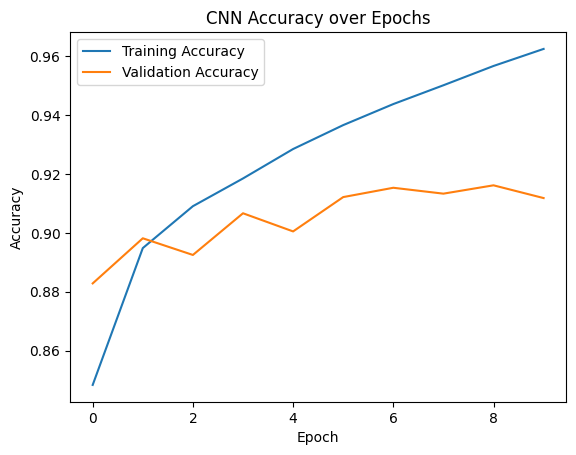

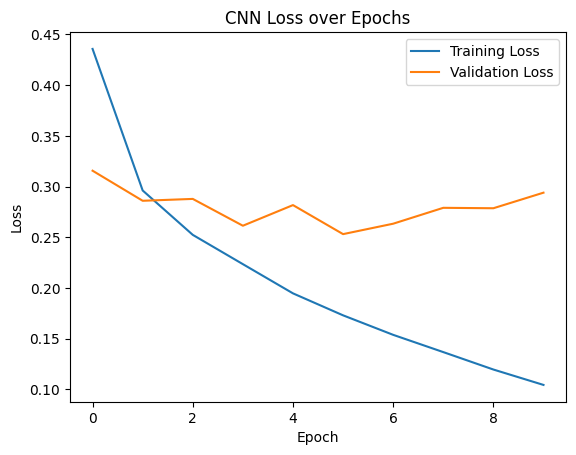

In [ ]:
import matplotlib.pyplot as plt # lets again import library

# Plot training & validation accuracy
plt.plot(training_log.history["accuracy"], label="Training Accuracy") # .history is dictionary that contains logs of accuracy/loss from training. 'accuracy':	This accesses the training accuracy at each epoch.
plt.plot(training_log.history["val_accuracy"], label="Validation Accuracy") # 'val_accuracy'	This accesses the validation accuracy (from the 10% of data we set aside using validation_split).
plt.title("CNN Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Plot training & validation loss
plt.plot(training_log.history["loss"], label="Training Loss")
plt.plot(training_log.history["val_loss"], label="Validation Loss")
plt.title("CNN Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


### 🧠 Let’s interpret what you’re seeing:

#### 🔷 **Top Graph: CNN Accuracy over Epochs**

* **Blue line (Training Accuracy)** steadily increases — that’s great! Your model is learning from the data.
* **Orange line (Validation Accuracy)** rises at first and then flattens — that’s **normal**. It means the model is **generalizing well** to unseen data up to a point.

> ✅ No major overfitting. Training and validation accuracies are reasonably close.

---

#### 🔶 **Bottom Graph: CNN Loss over Epochs**

* **Blue line (Training Loss)** drops steadily — which means the model is minimizing error on training data.
* **Orange line (Validation Loss)** drops at first, then **flattens and slightly increases** — this is a **minor overfitting signal**, but not severe.

> 🟡 You can improve this later with:
>
> * Dropout layers
> * Early stopping
> * Data augmentation

---

### ✅ Summary

| Aspect                | Status                       |
| --------------------- | ---------------------------- |
| Model training        | ✅ Successful                 |
| Accuracy trends       | ✅ Valid                      |
| Overfitting risk      | ⚠️ Slight, but under control |
| Visualization quality | ✅ Clear and correct          |

---

### **Part 5: Evaluate Accuracy and Confusion Matrix**

### 📌 First, Evaluate Your Model on Test Data

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9094 - loss: 0.3077
Test Accuracy: 0.9104999899864197


### 📌 Then, Get Predictions

In [ ]:
y_pred_probabilities = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


### ⚠️ Important: Convert Probabilities → Class Labels

conver probabilities to class labels from one hot encoded ones

In [ ]:
import numpy as np

y_pred_classes = np.argmax(y_pred_probabilities, axis=1)
y_true = np.argmax(y_test, axis=1)

### 📌 Now, Plot the Confusion Matrix

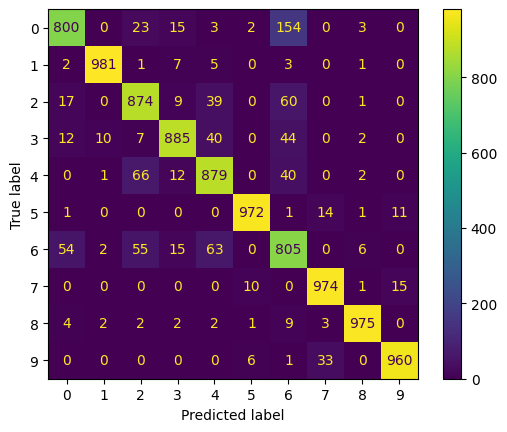

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

## ✅ **How to Read This Confusion Matrix (Fashion MNIST)**

### 📌 **Axes**

* **Rows (Y-axis):** True Labels (actual clothing items)
* **Columns (X-axis):** Predicted Labels (what your model guessed)
* The **diagonal cells** show **correct predictions**.
* Off-diagonal cells show **mistakes** (confusions).

---

## 🔍 **Top-Level Analysis**

* **Most of the big numbers are on the diagonal** → That’s *very good*. It means:

  > CNN model predicted the correct class **most of the time**.

* Some **confusions** do appear, especially:

  * Class 0 (T-shirt/top) misclassified as class 6 (Shirt): `154 times`
  * Class 6 (Shirt) confused with Class 0, 2, 4, 5 — common due to visual similarity.
  * Class 4 (Coat) and Class 2 (Pullover) confused with each other.

---

## 🧠 **Let’s Pick a Few Rows & Explain**

### ▶️ **Row 0: T-shirt/top**

* **800 times** predicted correctly as 0 ✅
* **154 times** predicted as class 6 ❌ → CNN confused it with **shirt** (understandable).

### ▶️ **Row 1: Trouser**

* **981 correct** → Excellent performance
* Only **minor misclassifications** → Model understands trousers very well ✅

### ▶️ **Row 5: Sandal**

* **972 correct**
* A few confusions with **sneaker (7)** and **ankle boot (9)** — fair enough.

### ▶️ **Row 6: Shirt**

* Only **805 correct**
* A lot of confusion with **T-shirt, pullover, coat** → common in real life too.

---

## 🎯 **What This Tells**

| Insight                                | What it Means                                   |
| -------------------------------------- | ----------------------------------------------- |
| High diagonal values                   | Model is learning well                          |
| Shirt confusion                        | More data or deeper model needed to separate it |
| Some classes like Trousers and Sandals | Model nails them almost perfectly               |

---
---

---
---

## **Extra:How cnn layes work internally:**

### ✅ Step-by-Step: What Happens to a Fashion MNIST Image (e.g., a "Sandal" or "Shirt")

---

#### 🧩 **1. Input Image**

* You start with **one grayscale image** → shape: `(28 × 28)`
* So total pixels = 784 (but CNN treats it as a 2D image)

---

#### 🎯 **2. Convolutional Layer (Conv2D)**

* You apply **32 filters** of size **3×3**
* For each image, you get **32 new learned features** (called *feature maps*) showing different patterns (edges, curves, etc.)
* The image shrinks to **26×26** because a 3×3 filter can't slide past the edge completely (unless padding is added)

🔸 So output shape = `(26, 26, 32)`

---

#### 🔻 **3. MaxPooling Layer**

* You reduce size using **2×2 pooling**, keeping only the max value in each 2×2 block
* Output shrinks to **13×13×32**

🔸 Shape becomes `(13, 13, 32)` → total **13×13×32 = 5408** numbers

---

#### 🧠 **4. Flatten**

* Convert those 5408 numbers into a flat 1D array:
  🔸 Shape: `(5408,)` → This represents all detected features in the image

---

#### ⚙️ **5. Dense Layer with 64 Neurons**

* Each neuron connects to **all 5408 values**
* all 5408 values are fed to each of 64 neurons. but in different combinations so there are 64 different combinations for all those 5408 values.
* So for 1 image, each neuron does:

  ```
  Output = ReLU(W1*x1 + W2*x2 + ... + W5408*x5408 + b)
  ```
* You get **64 outputs** — one from each neuron

🔸 Output shape for 1 image: `(64,)`

🔸 For batch of 32 images: `(32, 64)`

---

#### 🎯 **6. Final Dense Layer (10 outputs + softmax)**

* This layer maps the **64 features combinations** to **10 class probabilities**
  (e.g., is it a shirt, sandal, sneaker, bag…)
* Each of the 10 outputs gives a **probability for that class**
* The highest value wins!

🔸 Output shape: `(10,)` for 1 image

🔸 Output shape: `(32, 10)` for a batch of 32 images

---

### ✅ Final Classification:

* For each image, the model says:

  > "This image has a 92% chance of being a **T-shirt**, 3% chance of **Sneaker**, 5% chance of **Pullover**…"

---

### 💡 Your line:

Those labels (0 to 9) map to **specific clothing classes** like:

| Label | Clothing Type |
| ----- | ------------- |
| 0     | T-shirt/top   |
| 1     | Trouser       |
| 2     | Pullover      |
| 3     | Dress         |
| 4     | Coat          |
| 5     | Sandal        |
| 6     | Shirt         |
| 7     | Sneaker       |
| 8     | Bag           |
| 9     | Ankle boot    |

---